In [1]:
import pandas as pd

import tweepy as tw
from twittersecret import ACCESS_TOKEN, ACCESS_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET

import json

import time

# Autenticação de acesso a API do Twitter

In [2]:
auth = tw.OAuthHandler(consumer_key=CONSUMER_KEY, consumer_secret=CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tw.API(auth)

In [3]:
# código de indentificação do país de onde serão extraídas as tendencias
BRAZIL_WOE_ID = 23424768

# Gerando a lista dos top 10 tópicos mais comentados

In [4]:
# extraindo as trends
brazil_trends = api.get_place_trends (BRAZIL_WOE_ID)

In [5]:
# tranformação de dataframe
trends_df = pd.DataFrame.from_dict(brazil_trends[0]["trends"])
trends_df.head()

,name,url,promoted_content,query,tweet_volume
0,MAIARA E MARAISA DVD PORTUGAL,http://twitter.com/search?q=%22MAIARA+E+MARAIS...,None,%22MAIARA+E+MARAISA+DVD+PORTUGAL%22,18566.0
1,Kyrie,http://twitter.com/search?q=Kyrie,None,Kyrie,178335.0
2,Caio Castro,http://twitter.com/search?q=%22Caio+Castro%22,None,%22Caio+Castro%22,NaN
3,Chelsea,http://twitter.com/search?q=Chelsea,None,Chelsea,283640.0
4,Nets,http://twitter.com/search?q=Nets,None,Nets,77616.0


In [6]:
# eliminando as colunas que não serão utilizadas
trends_df.drop(columns=["url", "promoted_content", "query"], axis=1, inplace=True)
trends_df.head()

,name,tweet_volume
0,MAIARA E MARAISA DVD PORTUGAL,18566.0
1,Kyrie,178335.0
2,Caio Castro,NaN
3,Chelsea,283640.0
4,Nets,77616.0


In [7]:
# eliminação do caracter '#'
trends_df['name'] = trends_df['name'].str.replace('#', '')

# substituindo os valores nulos da coluna tweet_volume por 0
trends_df.fillna(0, inplace=True)

# convertendo os valores da coluna tweet_volume para inteiro
trends_df[['tweet_volume']] = trends_df[['tweet_volume']].astype('int')

# colocando a coluna name em ordem decrescente pela coluna tweet_volume 
trends_df.sort_values(by='tweet_volume', ascending=False, inplace=True)

# resetando o índice
trends_df.reset_index(inplace=True, drop=True)

# exibindo a lista com os dez tópicos mais comentados no twitter
trends_df.head(10)

,name,tweet_volume
0,Chelsea,283640
1,Kyrie,178335
2,Moraes,97753
3,Enzo Fernandez,85703
4,Mudryk,79897
5,Nets,77616
6,Potter,72843
7,Mount,63995
8,LOVE YOU KRISTINA,47748
9,Virgínia,38401


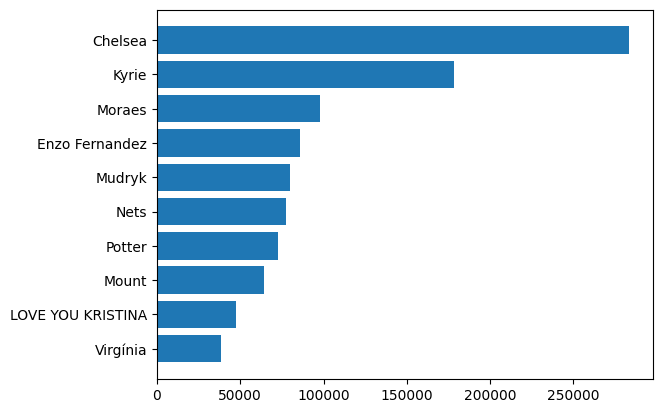

In [8]:
import matplotlib.pyplot as plt

df = trends_df.head(10).sort_values(by=['tweet_volume'], ascending=True)

x= df['tweet_volume']
y= df['name']
plt.barh(y=y, width=x);

In [9]:
# gerando a lista das 10 primeiros tópicos
trends_top10_list = list(trends_df['name'][:10])
trends_top10_list

['Chelsea',
 'Kyrie',
 'Moraes',
 'Enzo Fernandez',
 'Mudryk',
 'Nets',
 'Potter',
 'Mount',
 'LOVE YOU KRISTINA',
 'Virgínia']

# Extração dos tweets a partir da lista dos dez tópicos mais comentados

In [10]:
query_search = trends_top10_list[0] + ' -filter:retweets'
cursor_tweets = tw.Cursor(api.search_tweets,
                                    q=query_search,
                                    lang="pt").items(1)

for tweet in cursor_tweets:
    print(tweet._json)

{'created_at': 'Fri Feb 03 21:46:29 +0000 2023', 'id': 1621626203173191680, 'id_str': '1621626203173191680', 'text': 'OFICIAL! Roberto Carlos é do Chelsea!', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'pt', 'result_type': 'recent'}, 'source': '<a href="https://cheapbotsdonequick.com" rel="nofollow">Cheap Bots, Done Quick!</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1284270786157645824, 'id_str': '1284270786157645824', 'name': 'FutBot', 'screen_name': 'BotdelFut', 'location': '', 'description': 'Mande templates de mensagem, jogadores, times, estádios, etc que você quer ver o bot falar na dm', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 42, 'friends_count': 50, 'listed_count': 0, 'created_at': 'Fri Jul 17 23:36:41 

In [11]:
from tqdm import tqdm

tweet_keys = tweet._json.keys()
tweet_dict = {}
tweet_dict = tweet_dict.fromkeys(tweet_keys)
tendencia = []

for trend in trends_top10_list:
    query_search = trend + ' -filter:retweets'
    cursor_tweets = tw.Cursor(api.search_tweets,
                                        q=query_search,
                                        lang="pt").items(200)
    
    
    for i, tweet in zip(tqdm(range(0,200), ncols = 100, desc = trend), cursor_tweets):
        time.sleep(.1)

        tendencia.append(trend)

        for key in tweet_dict.keys():
            try:
                tweet_keys = tweet._json[key]
                tweet_dict[key].append(tweet_keys)
                
            except KeyError:
                tweet_keys = ""
                tweet_dict[key].append("")
            except:
                tweet_dict[key] = [tweet_keys]

Virgínia: 100%|███████████████████████████████████████████████████| 200/200 [00:29<00:00,  6.75it/s]


In [12]:
len(tendencia)

2000

In [13]:
# transformando do dicionário em dataframe
tweets_df = pd.DataFrame.from_dict(tweet_dict)
tweets_df['trend_t'] = tendencia
tweets_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,trend_t
0,Fri Feb 03 21:48:07 +0000 2023,1621626610720849920,1621626610720849920,Lista Negra das apostas:\n\nChelsea\nAtlético ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,None,None,None,False,0,0,False,False,pt,Chelsea
1,Fri Feb 03 21:48:01 +0000 2023,1621626589111898115,1621626589111898115,time ruim esse do chelsea credo,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,None,...,None,None,None,False,0,0,False,False,pt,Chelsea
2,Fri Feb 03 21:48:00 +0000 2023,1621626583915061248,1621626583915061248,que time escroto só Chelsea,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,None,None,False,0,0,False,False,pt,Chelsea
3,Fri Feb 03 21:47:57 +0000 2023,1621626572775079938,1621626572775079938,chelsea contrata meio mundo e não consegue gan...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,None,None,None,False,0,0,False,False,pt,Chelsea
4,Fri Feb 03 21:47:57 +0000 2023,1621626571546034179,1621626571546034179,falo mal horrores do chelsea mas tenho vontade...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,None,None,False,0,0,False,False,pt,Chelsea


# Classificação de sentimento para posterior treinamento de modelos de machine learning

In [14]:
from leia import SentimentIntensityAnalyzer 

'''
importando biblioteca leia, que é derivada da vader (classificação de sentimento)

@misc{Almeida2018,
  author = {Almeida, Rafael J. A.},
  title = {LeIA - Léxico para Inferência Adaptada},
  year = {2018},
  publisher = {GitHub},
  journal = {GitHub repository},
  howpublished = {/url{https://github.com/rafjaa/LeIA}}
}

O léxico VADER original é descrito no paper:

@inproceedings{gilbert2014vader,
  title={Vader: A parsimonious rule-based model for sentiment analysis of social media text},
  author={Gilbert, CJ Hutto Eric},
  booktitle={Eighth International Conference on Weblogs and Social Media (ICWSM-14). Available at (20/04/16) http://comp. social. gatech. edu/papers/icwsm14. vader. hutto. pdf},
  year={2014}
}

'''

# instanciando
analyser = SentimentIntensityAnalyzer()

In [15]:
def classificador_sentimento(texto):
    ''' transforma e guardar o score (compoud) '''
    df_analisado = analyser.polarity_scores(texto)['compound'] 
    return df_analisado

def classificador_score(score):
    ''' classifica o score '''
    if score > 0:
        return 2
    
    if score < 0:
        return 0
    
    return 1

In [16]:
# aplicando a função e guardando na coluna score
tweets_df['score'] = tweets_df['text'].apply(classificador_sentimento)

# aplicando a função e guardando na coluna sentiment
tweets_df['sentiment'] = tweets_df['score'].apply(classificador_score)

tweets_df

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,trend_t,score,sentiment
0,Fri Feb 03 21:48:07 +0000 2023,1621626610720849920,1621626610720849920,Lista Negra das apostas:\n\nChelsea\nAtlético ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,None,False,0,0,False,False,pt,Chelsea,0.0000,1
1,Fri Feb 03 21:48:01 +0000 2023,1621626589111898115,1621626589111898115,time ruim esse do chelsea credo,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,None,...,None,False,0,0,False,False,pt,Chelsea,-0.5574,0
2,Fri Feb 03 21:48:00 +0000 2023,1621626583915061248,1621626583915061248,que time escroto só Chelsea,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,0,0,False,False,pt,Chelsea,0.0000,1
3,Fri Feb 03 21:47:57 +0000 2023,1621626572775079938,1621626572775079938,chelsea contrata meio mundo e não consegue gan...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,None,False,0,0,False,False,pt,Chelsea,0.1280,2
4,Fri Feb 03 21:47:57 +0000 2023,1621626571546034179,1621626571546034179,falo mal horrores do chelsea mas tenho vontade...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,0,0,False,False,pt,Chelsea,-0.8381,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Fri Feb 03 20:55:27 +0000 2023,1621613359564050433,1621613359564050433,"Reagindo a ""Facilita Ai"" do Zé Felipe e Virgin...",True,"{'hashtags': [{'text': 'zefelipe', 'indices': ...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,None,False,0,1,False,False,pt,Virgínia,-0.4215,0
1996,Fri Feb 03 20:54:57 +0000 2023,1621613233638342657,1621613233638342657,Olha eu sigo a Virgínia mas passar pano para a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,0,0,False,False,pt,Virgínia,-0.4215,0
1997,Fri Feb 03 20:54:31 +0000 2023,1621613122267107331,1621613122267107331,https://t.co/NctoQT9Oj5 \n\nVirgínia Fonseca é...,True,"{'hashtags': [{'text': 'Virginia', 'indices': ...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,False,0,0,False,False,pt,Virgínia,0.0000,1
1998,Fri Feb 03 20:54:07 +0000 2023,1621613023512125440,1621613023512125440,Deixem a Virgínia viver e aceitem que ela é um...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,5,43,False,False,pt,Virgínia,0.0000,1


In [17]:
tweets_df.to_csv('tweets_raw.csv', encoding='utf-8')

In [18]:
# exibindo o conteúdo completo da coluna 'text' 
pd.set_option('display.max_colwidth', None)

In [19]:
# exibindo o texto e o sentimento
tweets_df[['text', 'sentiment', 'trend_t']]

,text,sentiment,trend_t
0,Lista Negra das apostas:\n\nChelsea\nAtlético de Madrid\nJuventus\nPSG,1,Chelsea
1,time ruim esse do chelsea credo,0,Chelsea
2,que time escroto só Chelsea,1,Chelsea
3,"chelsea contrata meio mundo e não consegue ganhar do fulham, palhaçada viu time ridículo",2,Chelsea
4,falo mal horrores do chelsea mas tenho vontade de m quando alguém que NÃO é blue fala,0,Chelsea
...,...,...,...
1995,"Reagindo a ""Facilita Ai"" do Zé Felipe e Virginia 😱\nhttps://t.co/sAjrWjDN4J\n\n#zefelipe #FacilitaAi #Virginia… https://t.co/pvJB7UWJ0o",0,Virgínia
1996,Olha eu sigo a Virgínia mas passar pano para aquelas tranças dela já é de mais para o meu coração,0,Virgínia
1997,https://t.co/NctoQT9Oj5 \n\nVirgínia Fonseca é criticada por seu visual em videoclipe de Zé Felipe\n\n#Virginia… https://t.co/R3Gp3OzHvc,1,Virgínia
1998,Deixem a Virgínia viver e aceitem que ela é uma das maiores do insta https://t.co/TjFD2FkQbm,1,Virgínia
